# **Final Project Task 2 -Census Data EDA**

Requirements

Analyze hours-per-week Target Distribution

Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

Check for missing values and report the number and percentage of missing data for each column.

Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

Generate bar plots for at least three categorical columns and discuss the frequency distributions.

Identify outliers in at least one numerical column using boxplots.

Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age    workclass  fnlwgt     education  education-num  \
15553   41      Private  166662   Prof-school             15   
9412    24      Private  177287  Some-college             10   
11922   19      Private   71650       HS-grad              9   
27363   62    State-gov  202056     Bachelors             13   
10169   20      Private  234880  Some-college             10   
25718   53    Local-gov  131258   Prof-school             15   
23328   31  Federal-gov  101345       HS-grad              9   
3090    40      Private  190122  Some-college             10   
13355   20      Private   84726  Some-college             10   
15612   59      Private  246262  Some-college             10   

           marital-status         occupation   relationship   race     sex  \
15553  Married-civ-spouse    Exec-managerial        Husband  White    Male   
9412        Never-married  Handlers-cleaners      Own-child  White  Female   
11922       Never-married    Farming-fishing      Own-child  White    Male   
27363            Divorced     Prof-specialty  Not-in-family  White    Male   
10169       Never-married              Sales      Own-child  White  Female   
25718       Never-married     Prof-specialty  Not-in-family  White  Female   
23328       Never-married  Handlers-cleaners      Own-child  White  Female   
3090            Separated       Adm-clerical  Not-in-family  White  Female   
13355       Never-married       Tech-support  Not-in-family  White  Female   
15612  Married-civ-spouse       Tech-support        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
15553             0             0              50  United-States   >50K  
9412              0             0              30  United-States  <=50K  
11922             0             0              40  United-States  <=50K  
27363         14084             0              40  United-States   >50K  
10169             0             0              30  United-States  <=50K  
25718             0             0              50  United-States   >50K  
23328             0             0              40  United-States  <=50K  
3090              0             0              40  United-States  <=50K  
13355             0             0              40  United-States  <=50K  
15612             0             0              40  United-States   >50K

#### Analyze hours-per-week Target Distribution

**Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.**

Summary Statistics for hours-per-Week:
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


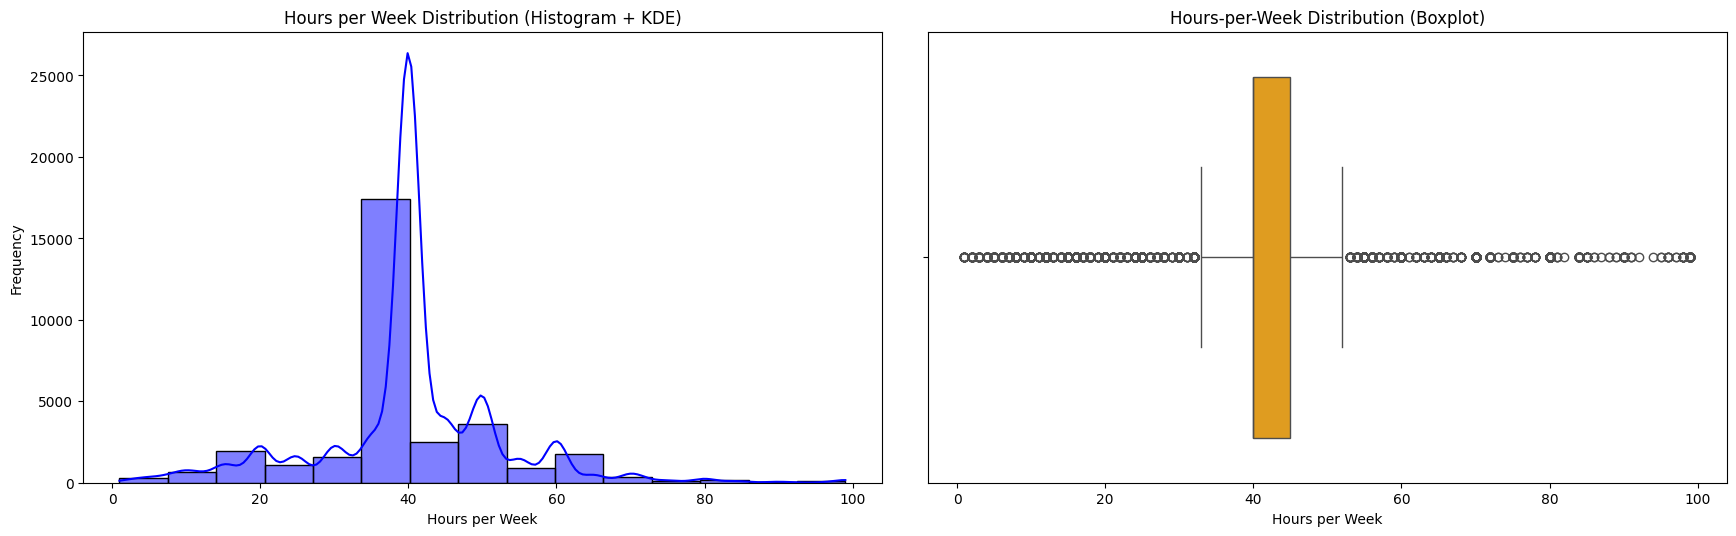

In [208]:
# Calculate summary statistics
summary_stats = data['hours-per-week'].describe()

# Print summary statistics
print("Summary Statistics for hours-per-Week:")
print(summary_stats)

# Create visualizations for distribution analysis
plt.figure(figsize=(18, 6))

# Histogram with KDE (Density Plot)
plt.subplot(1, 2, 1)
sns.histplot(data['hours-per-week'], kde=True, bins=15, color='blue', edgecolor='black')
plt.title('Hours per Week Distribution (Histogram + KDE)')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

# Boxplot for Outlier Detection
plt.subplot(1, 2, 2)
sns.boxplot(x=data['hours-per-week'], color='orange')
plt.title('Hours-per-Week Distribution (Boxplot)')
plt.xlabel('Hours per Week')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/hours-per-week-histogram-and-density-plot.png', dpi=75)

plt.show()

##### Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.


In [87]:
# Shows counts, mean, standard deviation, minimum, quartiles, and maximum for numerical columns
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

##### Check for missing values and report the number and percentage of missing data for each column.

In [88]:
# Count missing values in each column
missing_values_count = data.isnull().sum()
print(missing_values_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [89]:
# Apparently there are no missing values in data frame. 
# Use the sample function to explore data
data.sample(n=10)

age     workclass  fnlwgt     education  education-num  \
11457   62   Federal-gov  159165       HS-grad              9   
22536   60     Local-gov  165982       Masters             14   
4688    20             ?  249087  Some-college             10   
19764   22             ?  228480       HS-grad              9   
2069    34       Private  204991  Some-college             10   
20776   22             ?  229997  Some-college             10   
4197    51   Federal-gov   45334  Some-college             10   
8710    52  Self-emp-inc  181855   Prof-school             15   
31889   38       Private   65390    Assoc-acdm             12   
16754   26     Local-gov   80485     Bachelors             13   

              marital-status       occupation   relationship  \
11457                Widowed  Exec-managerial  Not-in-family   
22536     Married-civ-spouse  Exec-managerial        Husband   
4688           Never-married                ?      Own-child   
19764     Married-civ-spouse                ?      Own-child   
2069                Divorced  Exec-managerial      Own-child   
20776  Married-spouse-absent                ?      Unmarried   
4197      Married-civ-spouse  Protective-serv        Husband   
8710      Married-civ-spouse   Prof-specialty        Husband   
31889     Married-civ-spouse     Craft-repair        Husband   
16754          Never-married   Prof-specialty  Not-in-family   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
11457               White  Female             0             0              36   
22536               White    Male             0             0              50   
4688                White  Female             0             0              40   
19764               White  Female             0             0              20   
2069                White    Male             0             0              44   
20776               Black  Female             0             0              40   
4197   Asian-Pac-Islander    Male             0             0              70   
8710                Other    Male         99999             0              65   
31889               White    Male             0             0              45   
16754               White  Female             0             0              38   

      native-country income  
11457  United-States  <=50K  
22536  United-States   >50K  
4688   United-States  <=50K  
19764  United-States  <=50K  
2069   United-States  <=50K  
20776  United-States  <=50K  
4197               ?  <=50K  
8710   United-States   >50K  
31889  United-States  <=50K  
16754  United-States  <=50K

In [90]:
# There are missing values in the data set, labelled as '?' 
# Replace '?' with NA
data.replace('?', pd.NA, inplace=True)

# Count missing values in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
total_rows = len(data)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a table with missing value information
missing_data = pd.DataFrame({'Missing Values': missing_values_count,
                            'Percentage': missing_values_percentage})

# Filter the DataFrame to keep only rows where at least one missing value exists
missing_data_filtered = missing_data[missing_data.sum(axis=1) > 0]

# Sort by percentage of missing values in descending order
missing_data_filtered = missing_data_filtered.sort_values(by='Percentage', ascending=False)

# Print the table
print(missing_data_filtered)

                Missing Values  Percentage
occupation                1843    5.660146
workclass                 1836    5.638647
native-country             583    1.790486


##### Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

In [91]:
# Check the type of columns in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


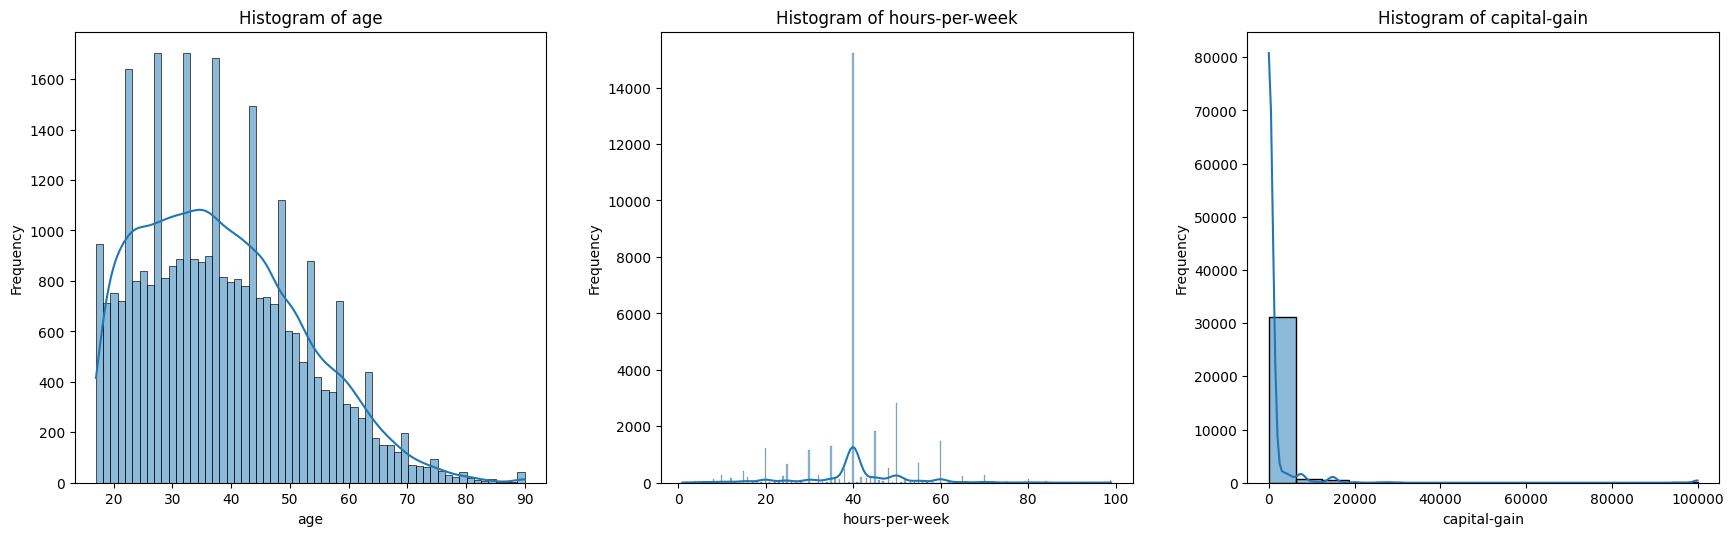

In [193]:
# We select 'age', 'income' and 'hours-per-week' columns, as they are all numerical
numerical_cols = ['age', 'hours-per-week', 'capital-gain'] 

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot histograms for each column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/histograms-for-age-hours-per-week-capital-gain.png', dpi=75)

plt.show()

#### Histogram discussion
##### Age:

Right-skewed: Most individuals are younger, with a tail towards older ages.
Peak around 35-40: The highest frequency of individuals is in the 35-40 age range.

##### Hours per week:

Unimodal - A single peak indicates a common working pattern.
Peak around 40: Most people work a standard 40-hour week.
Slight right skew: Some individuals work significantly more hours.

##### Capital gain:

Highly right-skewed: Most individuals have low or no capital gains, with a few having very high gains.
Bimodal: There might be a second peak at zero, indicating many individuals with no capital gain.


-------------------------------

#### Generate bar plots for at least three categorical columns and discuss the frequency distributions.

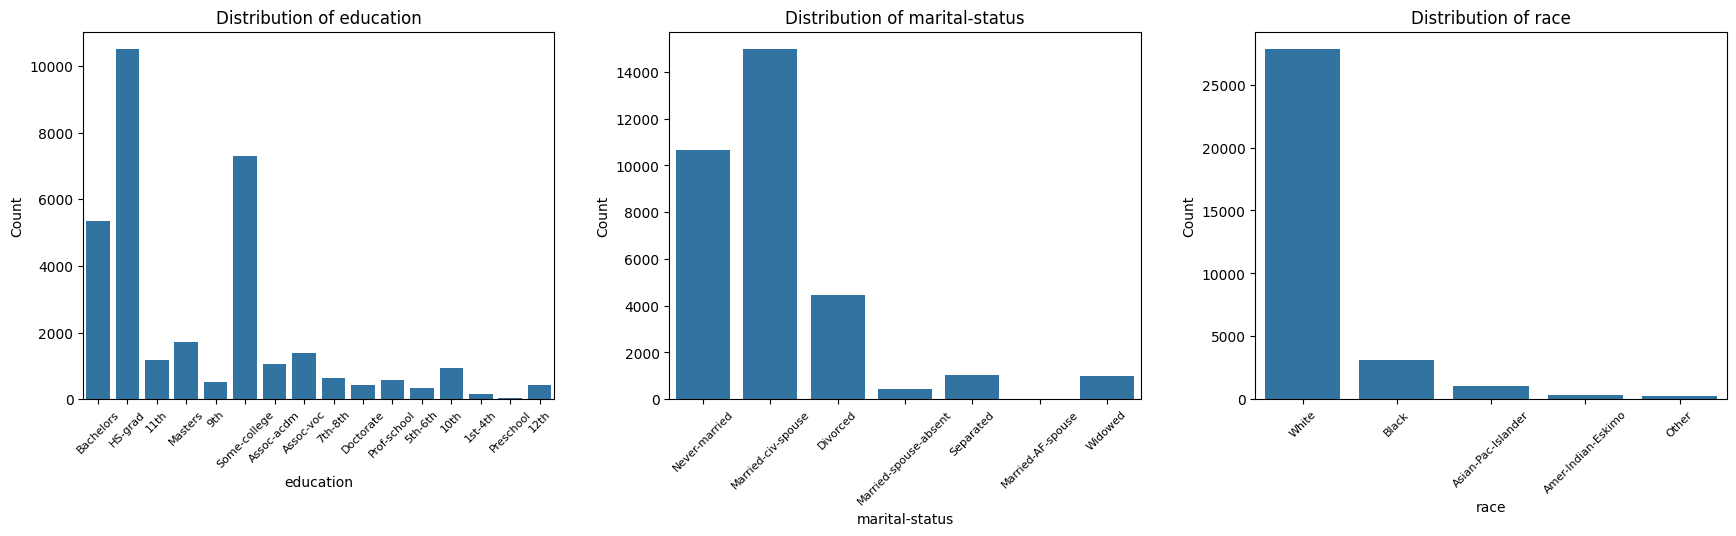

In [194]:
# Categorical columns: 'education', 'marital-status', 'race'
categorical_cols = ['education', 'marital-status', 'race']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot bar plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better readability

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/barplot-for-education-marital-status-race.png', dpi=75)

plt.show()

##### Education:

Most Frequent: "HS-grad" (High School Graduate) is by far the most common level of education in the dataset.
Other Common Levels: "Some-college" and "Bachelors" are also relatively frequent.
Less Frequent Levels: Levels such as "Doctorate", "Prof-school", and "Preschool" are much less common.

##### Marital-status:

Most Frequent: "Married-civ-spouse" is the most common marital status, indicating a significant portion of the population is married.
Other Common Statuses: "Never-married" and "Divorced" are also relatively frequent.
Less Frequent Statuses: Statuses such as "Married-AF-spouse", "Married-spouse-absent", and "Widowed" are much less common.

##### Race:

Most Frequent: "White" is the most dominant race in the dataset by a significant margin.
Other Races: "Black" is the second most frequent race, followed by "Asian-Pac-Islander" and "Amer-Indian-Eskimo".
Less Frequent Races: "Other" and "Black" have the lowest representation.

##### Overall Observations:

The distribution of education levels shows a significant portion of the population with a high school education or some college.
The distribution of marital status indicates a relatively high proportion of married individuals in the dataset.
The distribution of race shows a significant majority of individuals identifying as White, with other races having lower representation.

----------------------------------------------------------------------

#### Identify outliers in at least one numerical column using boxplots.

Outliers in 'age':
74       79
222      90
430      80
918      81
1040     90
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 143, dtype: int64


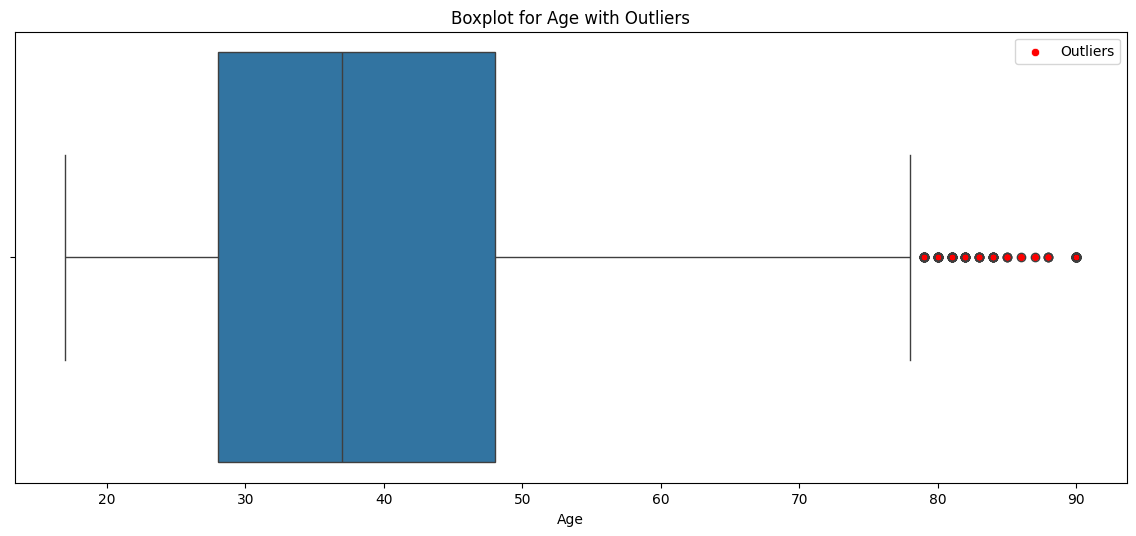

In [195]:

# Calculate the first and third quartiles
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

# Print the outliers
print(f"Outliers in 'age':\n{outliers['age']}") 

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', data=data)

# Plot the outliers as red dots
sns.scatterplot(x=outliers['age'], y=[0]*len(outliers), color='red', label='Outliers')

plt.title('Boxplot for Age with Outliers')
plt.xlabel('Age')
plt.legend()

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/boxplot-for-age.png', dpi=75)

plt.show()

The distribution of age is right-skewed, meaning there are more younger individuals in the dataset and a few older outliers.
Outliers: The presence of the right-hand whisker and individual data points beyond it indicates the existence of outliers, which are individuals significantly older than the majority.

-----------------------------

There isn't a strong, linear relationship between education level and capital gain.
Some clustering of data points can be observed. For instance, there might be a concentration of points at lower education levels and lower capital gains.
A few data points might be far away from the main cluster, representing individuals with significantly higher capital gains for their education level.
Further analysis is needed to fully understand the complex interplay between these variables.

#### Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

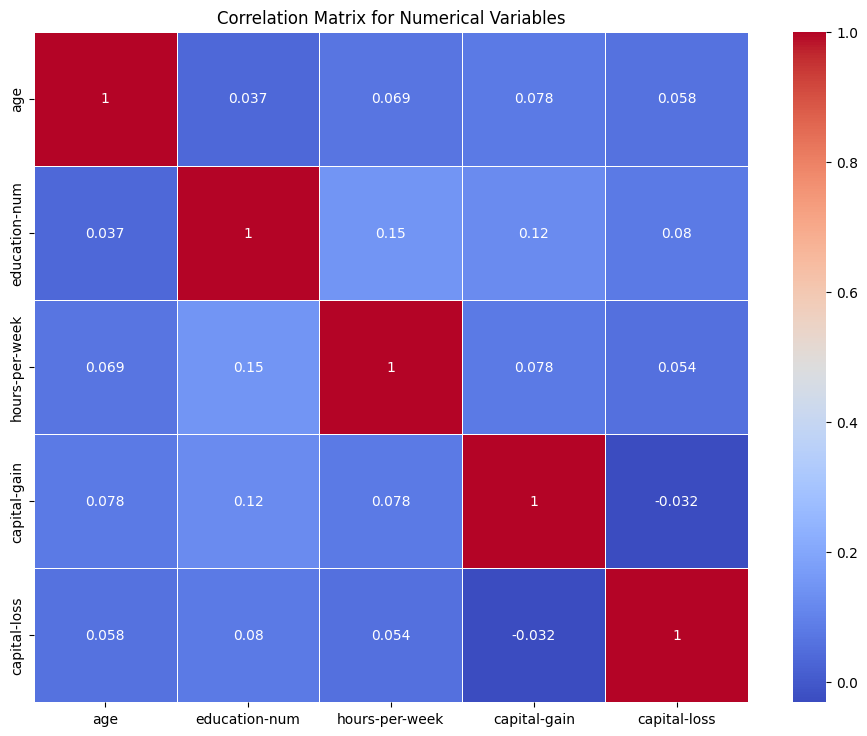

In [196]:
# Select the numerical columns 
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss'] 

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/corr-matrix-for-hours-per-week.png', dpi=75)

plt.show()

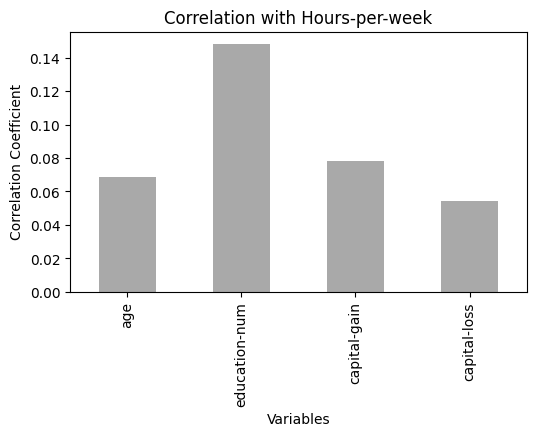

In [197]:
# Correlations with 'hours-per-week'
correlation_target = data[numerical_cols].corr()['hours-per-week'].drop('hours-per-week')

# Bar plot for correlations with target variable
plt.figure(figsize=(6, 5))
correlation_target.plot(kind='bar', color='darkgrey')

plt.title('Correlation with Hours-per-week')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/bars-for-correlations-with-hours-per-week.png', dpi=75)

plt.show()


The strongest correlation with the target variable (hours-per-week) is education-num. This indicates that the level of education (represented as education-num) has the most significant positive relationship with the number of hours worked per week.

The weakest correlation is with capital-loss. This suggests that the amount of capital-loss has very little relationship with the number of hours worked per week.

---------------------------------------

##### Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

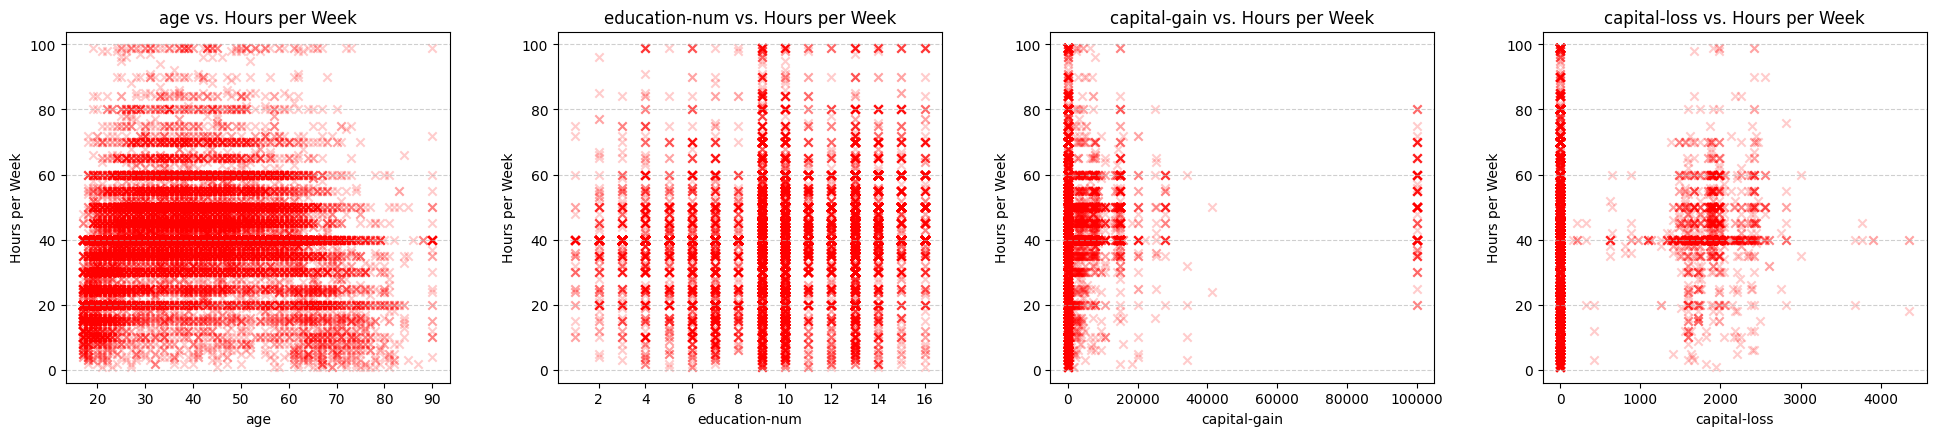

In [198]:
# List of numerical columns excluding 'hours-per-week' as target
numerical_cols_new = ['age', 'education-num', 'capital-gain', 'capital-loss']

# Define the number of subplots
num_cols = len(numerical_cols_new)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))

# Loop through each numerical column and create a scatter plot in a subplot
for i, col in enumerate(numerical_cols_new):
    ax = axes[i]  # Correctly reference each subplot
    ax.scatter(data[col], data['hours-per-week'], alpha=0.2, color='red', marker='x')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_title(f'{col} vs. Hours per Week')
    ax.set_xlabel(col)
    ax.set_ylabel('Hours per Week')

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/scatterplots-hours-per-week.png', dpi=75)

plt.show()

Among all variables, education-num appears to have the strongest correlation with hours-per-week. Higher education levels are associated with more hours worked, but the correlation is a weak one. 

##### Alternate visualisation for correlations of hours-per-week with the other numerical variables

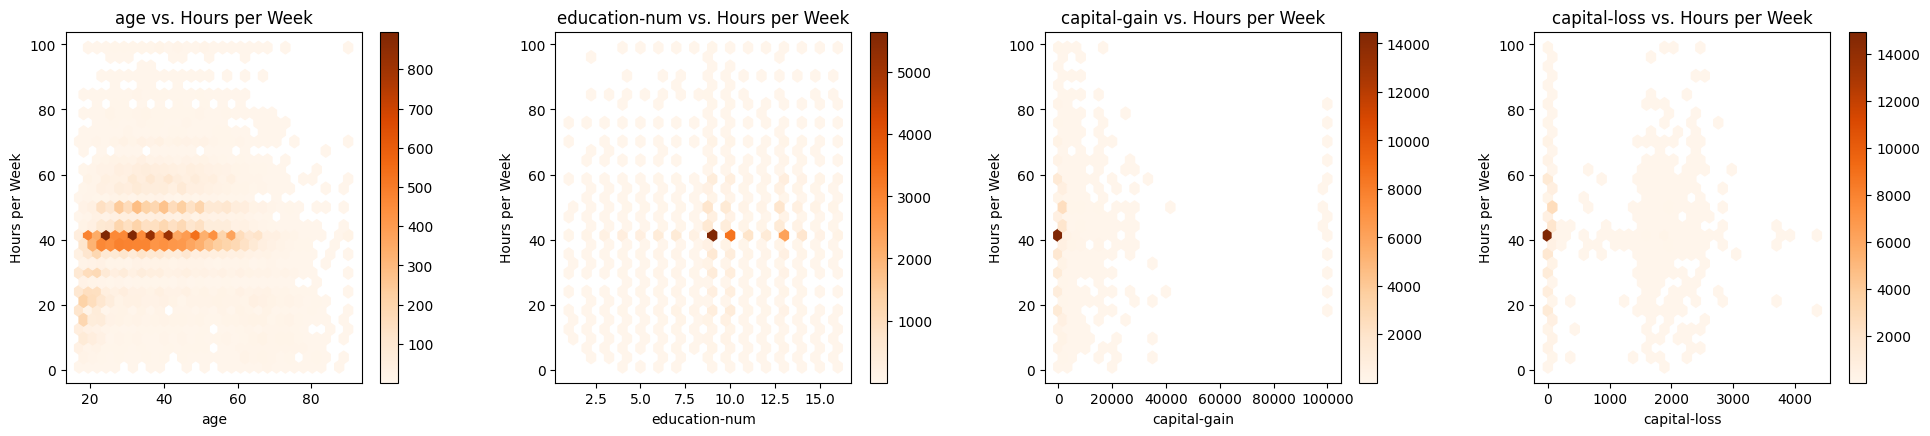

In [199]:
# Create hexbin plots for each numerical variable against 'hours-per-week'
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))

for i, col in enumerate(numerical_cols_new):
    ax = axes[i]
    hb = ax.hexbin(data[col], data['hours-per-week'], gridsize=30, cmap='Oranges', mincnt=1)
    ax.set_title(f'{col} vs. Hours per Week')
    ax.set_xlabel(col)
    ax.set_ylabel('Hours per Week')
    fig.colorbar(hb, ax=ax)

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/hexbinfor-hours-per-week.png', dpi=75)

plt.show()


**Age vs. Hours per Week:**

Most people aged 30–50 work around 40 hours per week.
Younger (<30) and older (>60) individuals tend to work fewer hours.

**Education-num vs. Hours per Week:**

People with an average education level (~10 years) mostly work 40 hours per week.
Education level has little impact on hours worked.

**Capital-gain vs. Hours per Week:**

Most people have no capital gains and work ~40 hours per week.
Higher capital gains (>20,000) are rare and show no clear link to hours worked.

**Capital-loss vs. Hours per Week:**

Most people have no capital losses and work ~40 hours per week.
Higher capital losses (>1,000) are uncommon and show no strong relationship with hours worked.

------------------------

#### Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

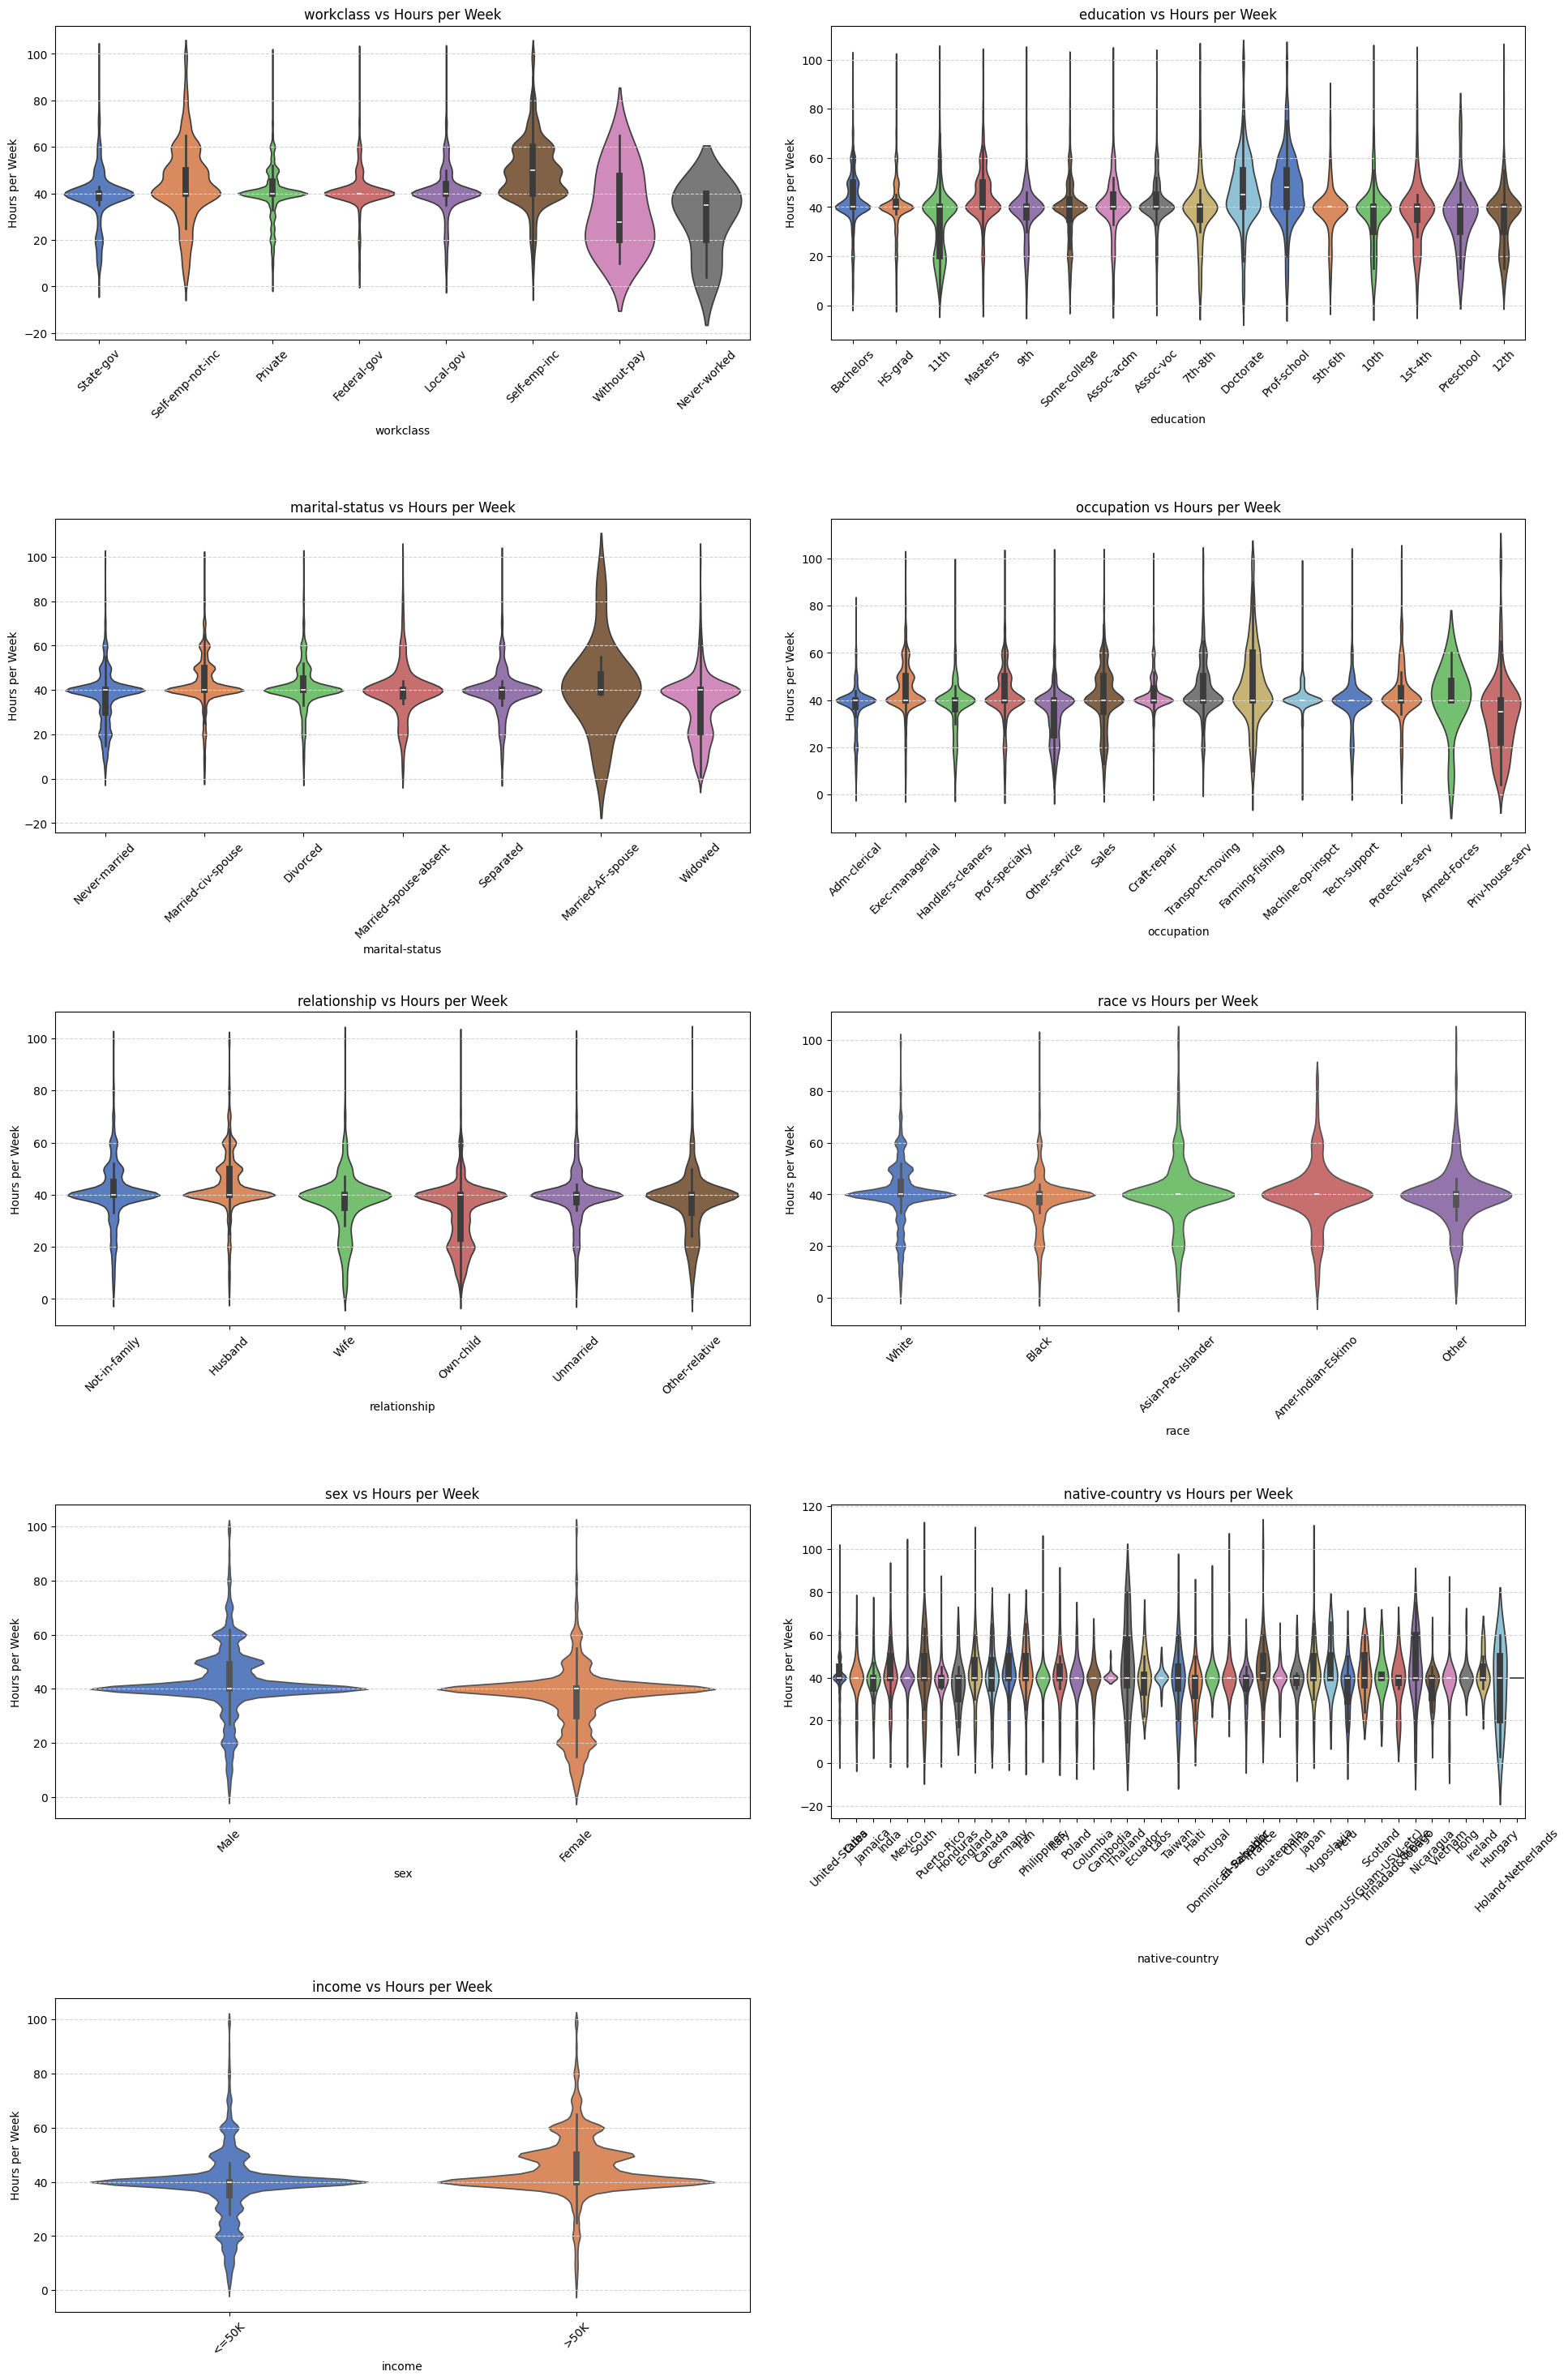

In [190]:
import math
# Categorical columns: 'education', 'marital-status', 'race'
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Define the number of rows and columns
num_cols = 2  # Number of plots per row
num_rows = math.ceil(len(categorical_cols) / num_cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10 * num_cols, 6 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through categorical columns and create violin plots
for i, var in enumerate(categorical_cols):
    sns.violinplot(
        data=data,
        x=var,
        y="hours-per-week",
        ax=axes[i],
        hue=var,
        palette="muted",
        legend=False  # Disable the legend as it's redundant
    )
    axes[i].set_title(f'{var} vs Hours per Week')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Hours per Week")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    axes[i].grid(axis='y', linestyle='--', color='lightgray')  # Add dotted grid on y-axis

# Remove any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])


# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/hours-per-week-vs-categorical-vars-violin-plot.png', dpi=75)

plt.show()

**1. workclass vs. hours-per-week**
Different work classes show varying distributions of hours worked.
Self-employed and Private workers display more variability, while Government workers tend to have a narrower range around 40 hours per week.
Without-pay or Never-worked categories show fewer hours worked.

**2. education vs. hours-per-week**
Higher levels of education (e.g., Doctorate, Masters) show a concentration of work hours around 40-50 per week, but some variability is visible.
Lower levels of education, such as Preschool, tend to have fewer hours worked.

**3. marital-status vs. hours-per-week**
Married-civ-spouse shows the highest concentration of hours worked around 40-50 per week.
Categories like Never-married and Divorced show slightly more variability, with some individuals working very few hours.

**4. occupation vs. hours-per-week**
Occupations like Exec-managerial and Prof-specialty show a higher concentration of individuals working 40-50 hours per week.
Occupations like Farming-fishing and Priv-house-serv show more individuals working fewer hours.

**5. relationship vs. hours-per-week**
Husbands work the most consistently around 40-50 hours per week.
Own-child and Unmarried categories show more variability with lower work hours.

**6. race vs. hours-per-week**
The distribution of hours worked is relatively similar across racial categories.
Slightly more variability is observed for Other and Asian-Pacific-Islander categories.

**7. sex vs. hours-per-week**
Males show a slightly higher tendency to work longer hours, with a broader spread compared to females.
Females show a narrower concentration around 40 hours per week.

**8. native-country vs. hours-per-week**
There is significant variability in hours worked across countries.
Some countries like United States show a strong concentration around 40 hours per week, while others, such as Outlying-US and Honduras, show much lower hours worked on average.

**9. income vs. hours-per-week**
Individuals with income >50K tend to work more hours, typically around 40-50 hours per week.
Those with income <=50K show a broader spread, with more individuals working fewer hours.

**General Observations**

Most categories show a strong concentration around 40 hours per week, which is consistent with standard work schedules.
Variability is more pronounced in categories like occupation, native-country, and workclass.

--------------------------------------------

#### Use a heatmap to visualize correlations among variables and highlight the top three strongest correlations.

Top 3 positive correlations:
        level_0        level_1  Correlation
0           age  education-num     0.036527
1  capital-gain   capital-loss    -0.031615
2  capital-loss   capital-gain    -0.031615


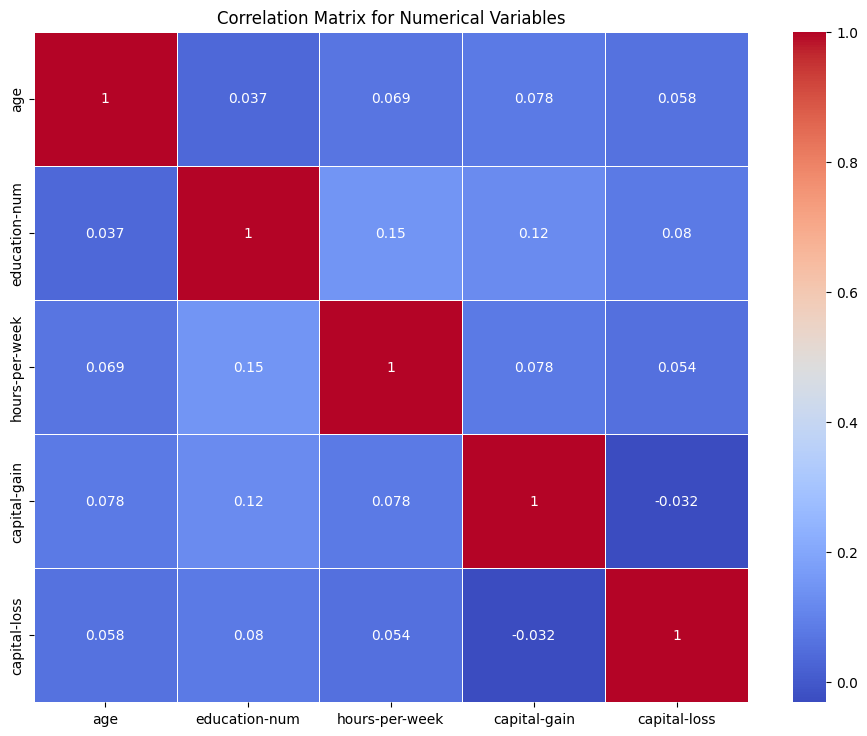

In [200]:
# Select numerical columns
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']
corr_matrix = data[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')

# Strongest correlations between variables
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Display top 3 correlations (excluding auto-correlations)
print("Top 3 positive correlations:")
top_3_df = sorted_pairs[-3:].reset_index().rename(columns={0: 'Correlation'})
print(top_3_df)

# Adjust the layout to avoid overlaps
plt.tight_layout(pad=3.0)

# Save the plot to a PNG file
plt.savefig('graphs/heatmap-correlation-numerical-values.png', dpi=75)

plt.show()

# **Summary Report from the EDA**

## **Key Patterns and Trends**
1. **Hours-per-Week Target Distribution**:
   - **Central Tendency**:
     - Most individuals work between **40 and 50 hours per week**, which aligns with standard work schedules.
   - **Spread**:
     - There is some variability with a small group working fewer hours (<30) or more hours (>60).
   - **Outliers**:
     - Potential outliers observed at very low (<20) and very high (>80) working hours.
   - **Skewness**:
     - The distribution is slightly **right-skewed**, indicating more individuals work fewer hours than those working excessive hours.

2. **Demographic Variables**:
   - **Education**:
     - Higher education levels (e.g., **Bachelor’s**, **Doctorate**) are associated with more consistent hours around 40–50 per week.
   - **Marital Status**:
     - Married individuals (e.g., **Married-civ-spouse**) tend to work more hours compared to other groups like **Never-married** or **Divorced**.
   - **Gender**:
     - Males work longer hours on average compared to females.

3. **Income Correlation**:
   - Higher working hours are generally correlated with **income >50K**.
   - Individuals earning **<=50K** show more variability in hours worked, including part-time hours.

4. **Correlation Analysis**:
   - **Hours-per-Week** shows:
     - Positive correlation with **education-num** (higher education is linked with more consistent work hours).
     - Weak or no correlation with **capital-gain** and **capital-loss**.

5. **Occupation**:
   - Professions such as **Exec-managerial** and **Prof-specialty** have a concentration around 40–50 hours per week.
   - Lower-paying or labor-intensive jobs (e.g., **Farming-fishing**) show a wider spread in hours worked.

---

## **Unexpected Insights or Anomalies**
1. **Missing Values**:
   - Certain categorical variables (e.g., **occupation**, **workclass**) have missing values represented as `?`. These need further cleaning or imputation.
2. **Outliers in `hours-per-week`**:
   - Observations with extremely low or high hours (e.g., <10 or >90 hours) may require further investigation. They could represent data entry errors or unique scenarios like students or seasonal workers.
3. **Native Country**:
   - Non-US countries show significant variability in hours worked, suggesting diverse work cultures.

---

## **Areas Requiring Further Investigation**
1. **Handling Missing Data**:
   - Address the `?` entries in columns like **occupation**, **workclass**, and **native-country**.
   - Analyze the impact of missing values on overall trends and decide between imputation or exclusion.
2. **Outlier Analysis**:
   - Investigate extreme cases in hours worked (<10 or >90) to determine their validity.
3. **Income vs. Hours-per-Week**:
   - Perform a more granular analysis of income categories and their association with hours worked.
4. **Categorical Variables**:
   - Explore relationships between `hours-per-week` and rarely occurring categories in variables like **native-country** for more nuanced insights.
